In [1]:
import numpy as np
import glob
from   PIL import Image, ImageOps
import matplotlib.pyplot as plt
import random

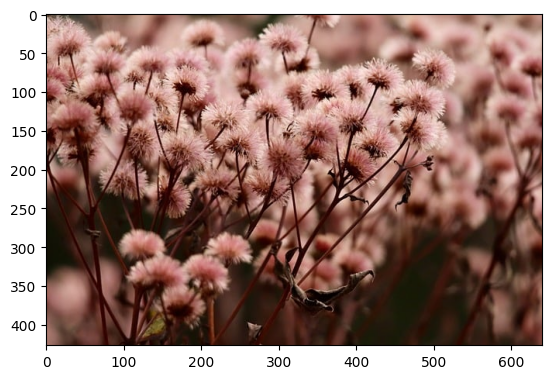

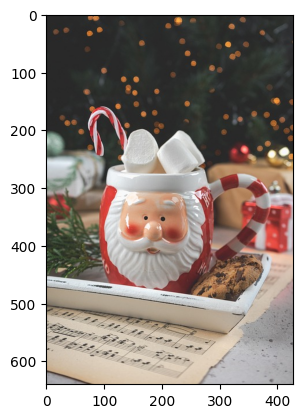

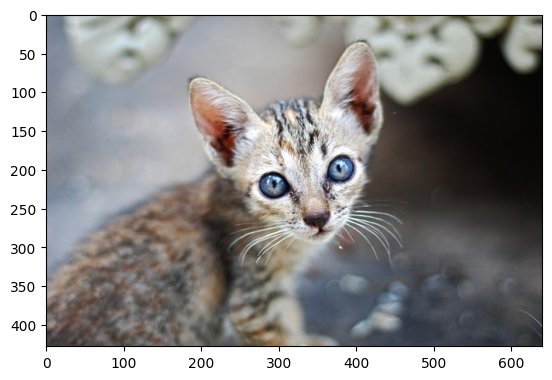

In [2]:
images = []

for filename in glob.glob('demo images/*.jpg'): #assuming gif
    im = Image.open(filename)
    im = np.array(im).astype(np.float32) / 255
    images.append(im)

    plt.imshow(im)
    plt.show()

In [3]:
def get_noisy_images(image, display_process = False):
    """Image should be of the format
    (height, width, channels), and be 
    filled with floats between 0 and 1.
    
    Returns a list of static images
    
    display_process tells whether or not
    to plot the static images as they are created"""
    
    # some pixels (I.e. dark ones) cannot have a sample
    # in the averaging process that is less than 0,
    # so this is not the number we will be adding + subtracting
    # from the image's pixels, it is the percentage
    # of the maximum value we can safely add + subtract
    # from each pixels' values.
    random_differences = np.random.uniform(0, 1, image.shape)
    # here we convert it to absolute values
    full_white = np.ones(image.shape)
    full_dark  = np.zeros(image.shape)
    maximum_changes = np.minimum(np.abs(image - full_dark), np.abs(image - full_white))
    random_differences *= maximum_changes

    static_image_A = image + random_differences
    static_image_B = image - random_differences

    if display_process:
        plt.imshow(static_image_A)
        plt.show()
        plt.imshow(static_image_B)
        plt.show()

    # now jumble pixels between the two, to shuffle it better

    swap_map = (np.random.random(image.shape) > .5) * 1

    static_image_A, static_image_B = (static_image_A * swap_map) + (static_image_B * (1 - swap_map)), (static_image_B * swap_map) + (static_image_A * (1 - swap_map))

    if display_process:
        plt.imshow(static_image_A)
        plt.show()
        plt.imshow(static_image_B)
        plt.show()

    return static_image_A, static_image_B

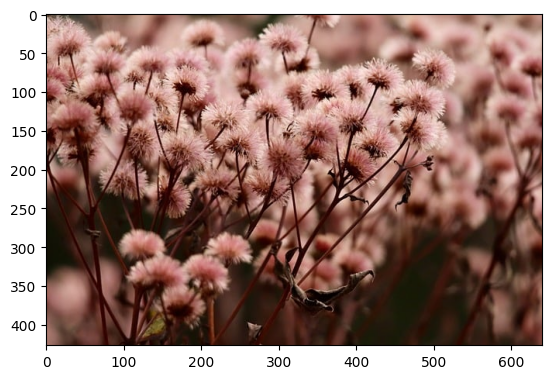

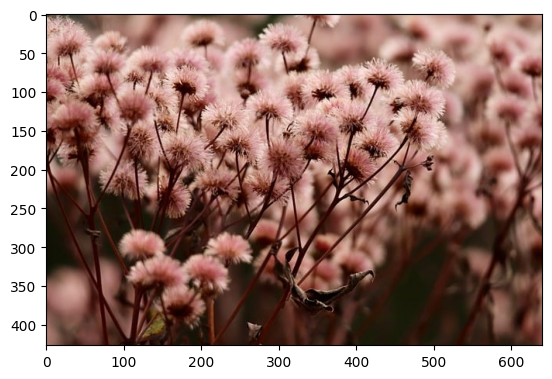

Difference between original and reconstructed image: 0.0


In [4]:
original_image = random.choice(images)
A, B = get_noisy_images(original_image)
reconstructed_image = (A+B) / 2

plt.imshow(original_image)
plt.show()
plt.imshow(reconstructed_image)
plt.show()

print("Difference between original and reconstructed image:", np.sum(original_image - reconstructed_image))


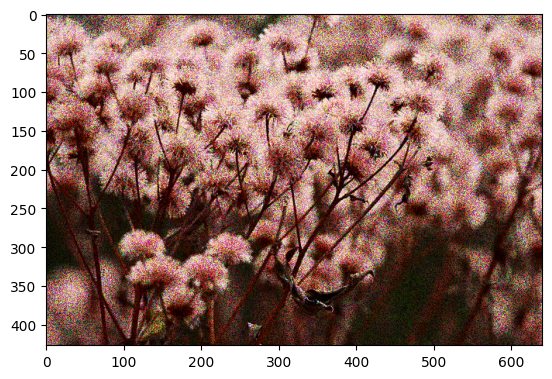

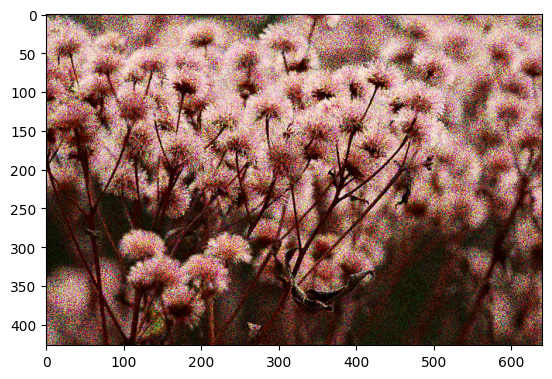

In [5]:
plt.imshow(A)
plt.show()
plt.imshow(B)
plt.show()

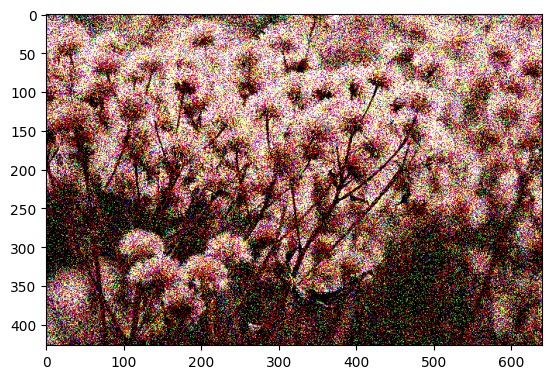

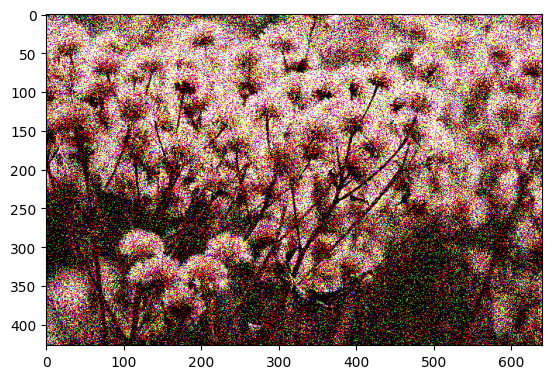

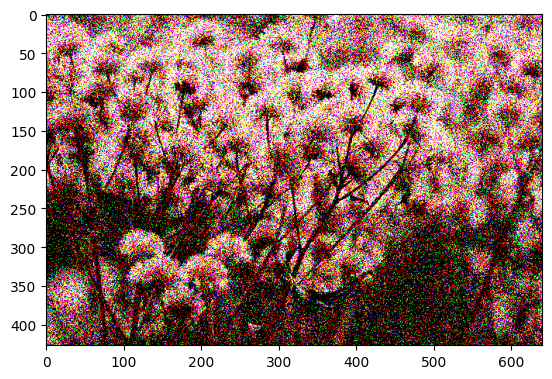

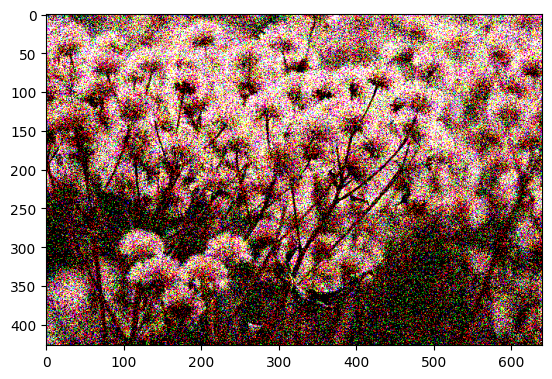

(array([[[9.99999999e-01, 3.69211582e-06, 3.33561384e-09],
         [2.30947953e-07, 7.89495655e-09, 9.99974598e-01],
         [3.78758045e-09, 1.81925217e-05, 1.86524835e-14],
         ...,
         [1.06326193e-05, 9.99999792e-01, 5.73633375e-10],
         [9.99999154e-01, 9.99991097e-01, 9.99999989e-01],
         [9.99999994e-01, 9.27642435e-08, 9.99999978e-01]],
 
        [[1.37408838e-11, 1.00000000e+00, 9.10536556e-01],
         [5.05500496e-07, 9.85930986e-07, 1.91747642e-10],
         [8.32799555e-08, 9.99999756e-01, 6.30982104e-11],
         ...,
         [3.33381295e-07, 9.99997556e-01, 1.00000000e+00],
         [9.99999891e-01, 9.99999617e-01, 9.99999926e-01],
         [1.00000000e+00, 1.02668654e-01, 9.99623940e-01]],
 
        [[2.61302275e-04, 5.93887371e-05, 1.50082798e-11],
         [9.99982306e-01, 3.86037173e-08, 1.00000000e+00],
         [1.83356238e-09, 3.34458410e-10, 6.26640736e-15],
         ...,
         [9.99999996e-01, 3.29479627e-13, 9.99109379e-01],
        

In [6]:
loop_image = np.array(original_image)
for i in range(50):
    loop_image, _ = get_noisy_images(loop_image)

get_noisy_images(loop_image, True)